# Retail Cohort Analysis

For e-commerce enterprises, the significance of cohort analysis cannot be overstated in comprehending both sales data and customer behavior. Cohort analysis involves categorizing customers into "cohorts" based on their acquisition date or the date of their initial purchase.

Tracking the subsequent activities of each cohort provides a profound understanding of crucial customer metrics, including customer lifetime value and retention rates. Customer lifetime value represents the total anticipated profit from a customer across all future interactions. Meanwhile, retention rate signifies the percentage of original customers retained after each specified time period.

In undertaking this analysis, my aim is to address two fundamental inquiries:

1. How can one effectively interpret and cleanse e-commerce data?
2. What steps are involved in creating a straightforward cohort analysis to compare metrics across different cohorts?

The dataset utilized for this study was sourced from the UCI Data Repository, encompassing 541,909 transactions of a UK-based non-store retail specializing in all-occasion gifts.

In [43]:
import pandas as pd
import seaborn as sb
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from textwrap import wrap
import matplotlib.figure as figure

In [4]:
data = pd.read_excel('online_retail.xlsx')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [8]:
retail_df = data
retail_df.columns = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price', 'cust_id','country']
retail_df['tot_order'] = retail_df['quantity']*retail_df['unit_price']
retail_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
retail_df.shape

(541909, 9)

<Axes: >

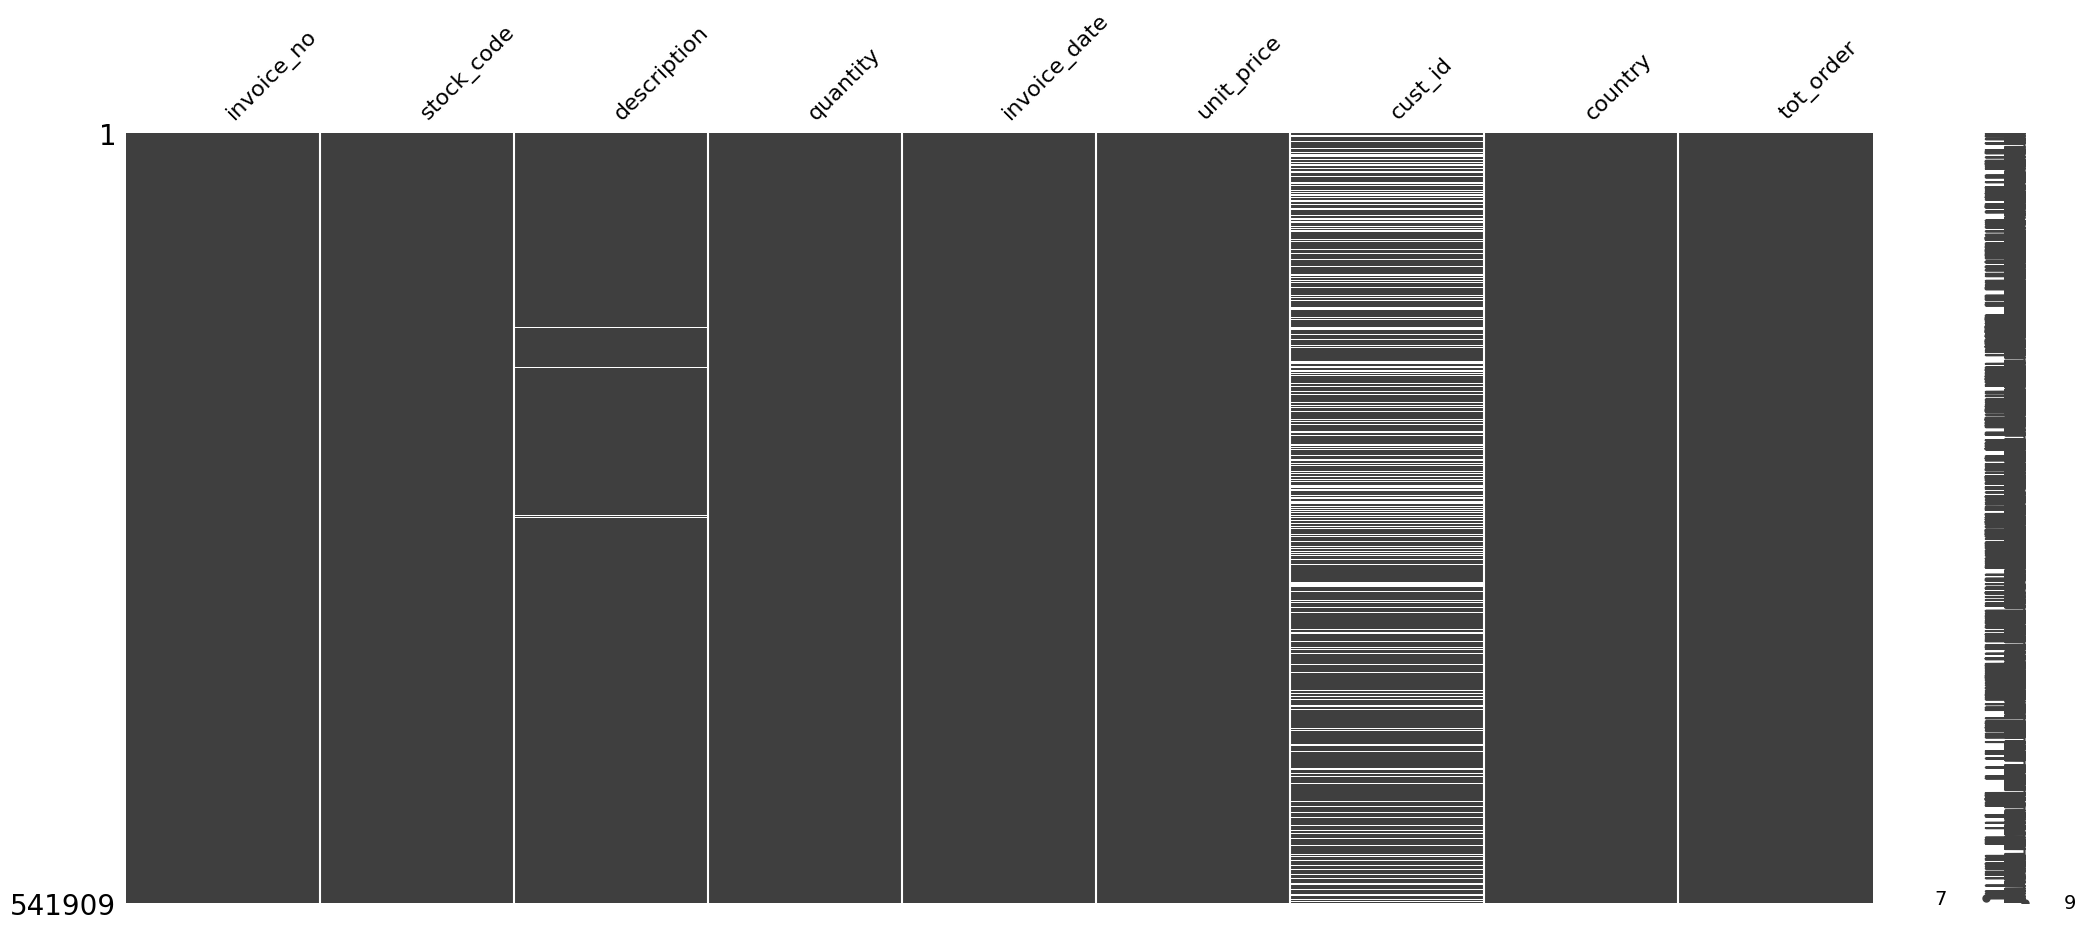

In [10]:
msno.matrix(retail_df)

## Handling Missing Values

In [11]:
retail_df = retail_df[retail_df['cust_id'].isna() == False]
retail_df.shape

(406829, 9)

In [12]:
retail_df.sort_values(by=['quantity'])

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0
...,...,...,...,...,...,...,...,...,...
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


A look at the quantity values also reveal some negative values. These can be intepreted as refunds. As refunds could be interesting for analyses later, we save them in a separate dataframe and remove them from the main dataframe.

As total the quantity and total order values of refunds and the original purchase cancel out when the dataframe is grouped and aggregated later, specific matching orders do not have to be identified.

In [13]:
refund_df = retail_df[retail_df['tot_order'] < 0]
refund_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


## Outliers

How about outliers in the data? Are there abnormally large order amounts?

In [14]:
input_num_columns = ['quantity', 'unit_price', 'tot_order']

In [15]:
# view all numerical column distribution

<ipython-input-16-f78c49801d11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt = sb.distplot(retail_df['unit_price'].value_counts(), kde = False)
<ipython-input-16-f78c49801d11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt = sb.distplot(retail_df['quantity'].value_counts(), kde = False)


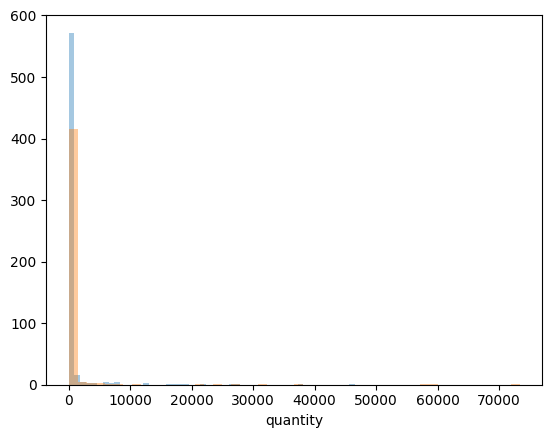

In [16]:
plt = sb.distplot(retail_df['unit_price'].value_counts(), kde = False)
plt = sb.distplot(retail_df['quantity'].value_counts(), kde = False)

In [17]:
retail_df[['quantity', 'unit_price', 'tot_order']].describe()

,quantity,unit_price,tot_order
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


A look at the distribution for quantity and unit price show that the majority of values are in single digits. There however seems to be outliers of up to 80,995 for order quantity and 38,970 for unit price. By running a quick filter, we see that the outliers mostly lie in small ticket items that cost around 1-2 pounds each. The most obvious outlier would be invoice number 581483. It seems that someone really really likes crafted paper birdies.

That is what the tutorial said [here](https://github.com/finnqiao/cohort_online_retail/blob/master/ukretail_cohort.ipynb), but they didn't mention how they reached this conclusion. Therefore, I did some digging, and decided to calculate IQR.

After that, I grouped and sorted the result. Thus, I got the invoice number 581483 at the top.

In [18]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
Q1 = retail_df.quantile(0.25)
Q3 = retail_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for each variable
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_quantity = retail_df[(retail_df['quantity'] < lower_bound['quantity']) | (retail_df['quantity'] > upper_bound['quantity'])]
outliers_unit_price = retail_df[(retail_df['unit_price'] < lower_bound['unit_price']) | (retail_df['unit_price'] > upper_bound['unit_price'])]
outliers_tot_order = retail_df[(retail_df['tot_order'] < lower_bound['tot_order']) | (retail_df['tot_order'] > upper_bound['tot_order'])]

# Print or analyze the outliers
print("Outliers in Quantity:")
print(outliers_quantity)

print("\nOutliers in Unit Price:")
print(outliers_unit_price)

print("\nOutliers in Total Order:")
print(outliers_tot_order)


Outliers in Quantity:
       invoice_no stock_code                       description  quantity  \
9          536367      84879     ASSORTED COLOUR BIRD ORNAMENT        32   
31         536370      10002       INFLATABLE POLITICAL GLOBE         48   
44         536370      22492           MINI PAINT SET VINTAGE         36   
46         536371      22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
65         536374      21258        VICTORIAN SEWING BOX LARGE        32   
...           ...        ...                               ...       ...   
541835     581579      23581            JUMBO BAG PAISLEY PARK        40   
541865     581583      20725           LUNCH BAG RED RETROSPOT        40   
541866     581583      85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867     581584      20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868     581584      85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   

              invoice_date  unit_price  cust_id         country  

<ipython-input-18-9fad335a6800>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = retail_df.quantile(0.25)
<ipython-input-18-9fad335a6800>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = retail_df.quantile(0.75)


In [19]:
grouped_outliers = outliers_quantity.groupby(['invoice_no', 'description'])['quantity'].sum().reset_index()

In [20]:
sorted_grouped_outliers = grouped_outliers.sort_values(by='quantity', ascending=False)

In [21]:
print(sorted_grouped_outliers)

      invoice_no                          description  quantity
25563     581483          PAPER CRAFT , LITTLE BIRDIE     80995
2528      541431       MEDIUM CERAMIC TOP STORAGE JAR     74215
24053     578841       ASSTD DESIGN 3D PAPER STICKERS     12540
20712     573008    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
9350      554868                 SMALL POPCORN HOLDER      4300
...          ...                                  ...       ...
26315    C570556     PINK BLUE FELT CRAFT TRINKET BOX     -2592
25862    C550456   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114
25598    C536757  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360
25715    C541433       MEDIUM CERAMIC TOP STORAGE JAR    -74215
26609    C581484          PAPER CRAFT , LITTLE BIRDIE    -80995

[26610 rows x 3 columns]


Next, we find outliers in the unit price column. For this step, we find the highest values by unit price:

In [22]:
retail_df.groupby('description').mean()['unit_price'].nlargest()

<ipython-input-22-c2d5ec97f92f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail_df.groupby('description').mean()['unit_price'].nlargest()


description
DOTCOM POSTAGE                    744.147500
PICNIC BASKET WICKER 60 PIECES    649.500000
CRUK Commission                   495.839375
Manual                            334.425634
REGENCY MIRROR WITH SHUTTERS      156.428571
Name: unit_price, dtype: float64

Seems like "DOTCOM POSTAGE" has the highest unit_price.
Also, there are some sus products: CRUK commission and manual. Let's dig deep into what kind of products they are, and do we really need them?

In [25]:
retail_df[retail_df['description'] == 'DOTCOM POSTAGE'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,11.17
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,16.46
333755,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,13.16
338829,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,85.58
350599,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,878.55


DOTCOM Postage seems like a postage price that customers pay for the products. We don't need it for the Cohort analysis.

Let's take a look at "Manual" and "CRUK commission"

In [27]:
retail_df[retail_df['description'] == 'CRUK Commission'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,-1.60
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,-13.01
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,-15.96
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,-52.24
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,-608.66


In [30]:
retail_df[retail_df['description'] == 'Manual'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,18.95
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,5.04
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,30.60


Since I'm not aware of the retail operations in detail, I'm assuming that "Manual" is the cost for manual services, and CRUK commission is some type of commission.

Now, we'll remove these categories from description.

In [41]:
removed_cats = ['DOTCOM POSTAGE', 'CRUK Commission', 'Manual', 'POSTAGE']
retail_df = retail_df[~retail_df['description'].isin(removed_cats)]
retail_df.shape

(405136, 9)

## Data Visualization
We'll try to answer the following questions through charts:
1. Total order amount by country (top 10 countries)
2. Top 10 Most Sold Items

### Total Order Amount by Country

<ipython-input-44-a2f94a478543>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_order = retail_df.groupby('country').sum()['tot_order'].nlargest(10)


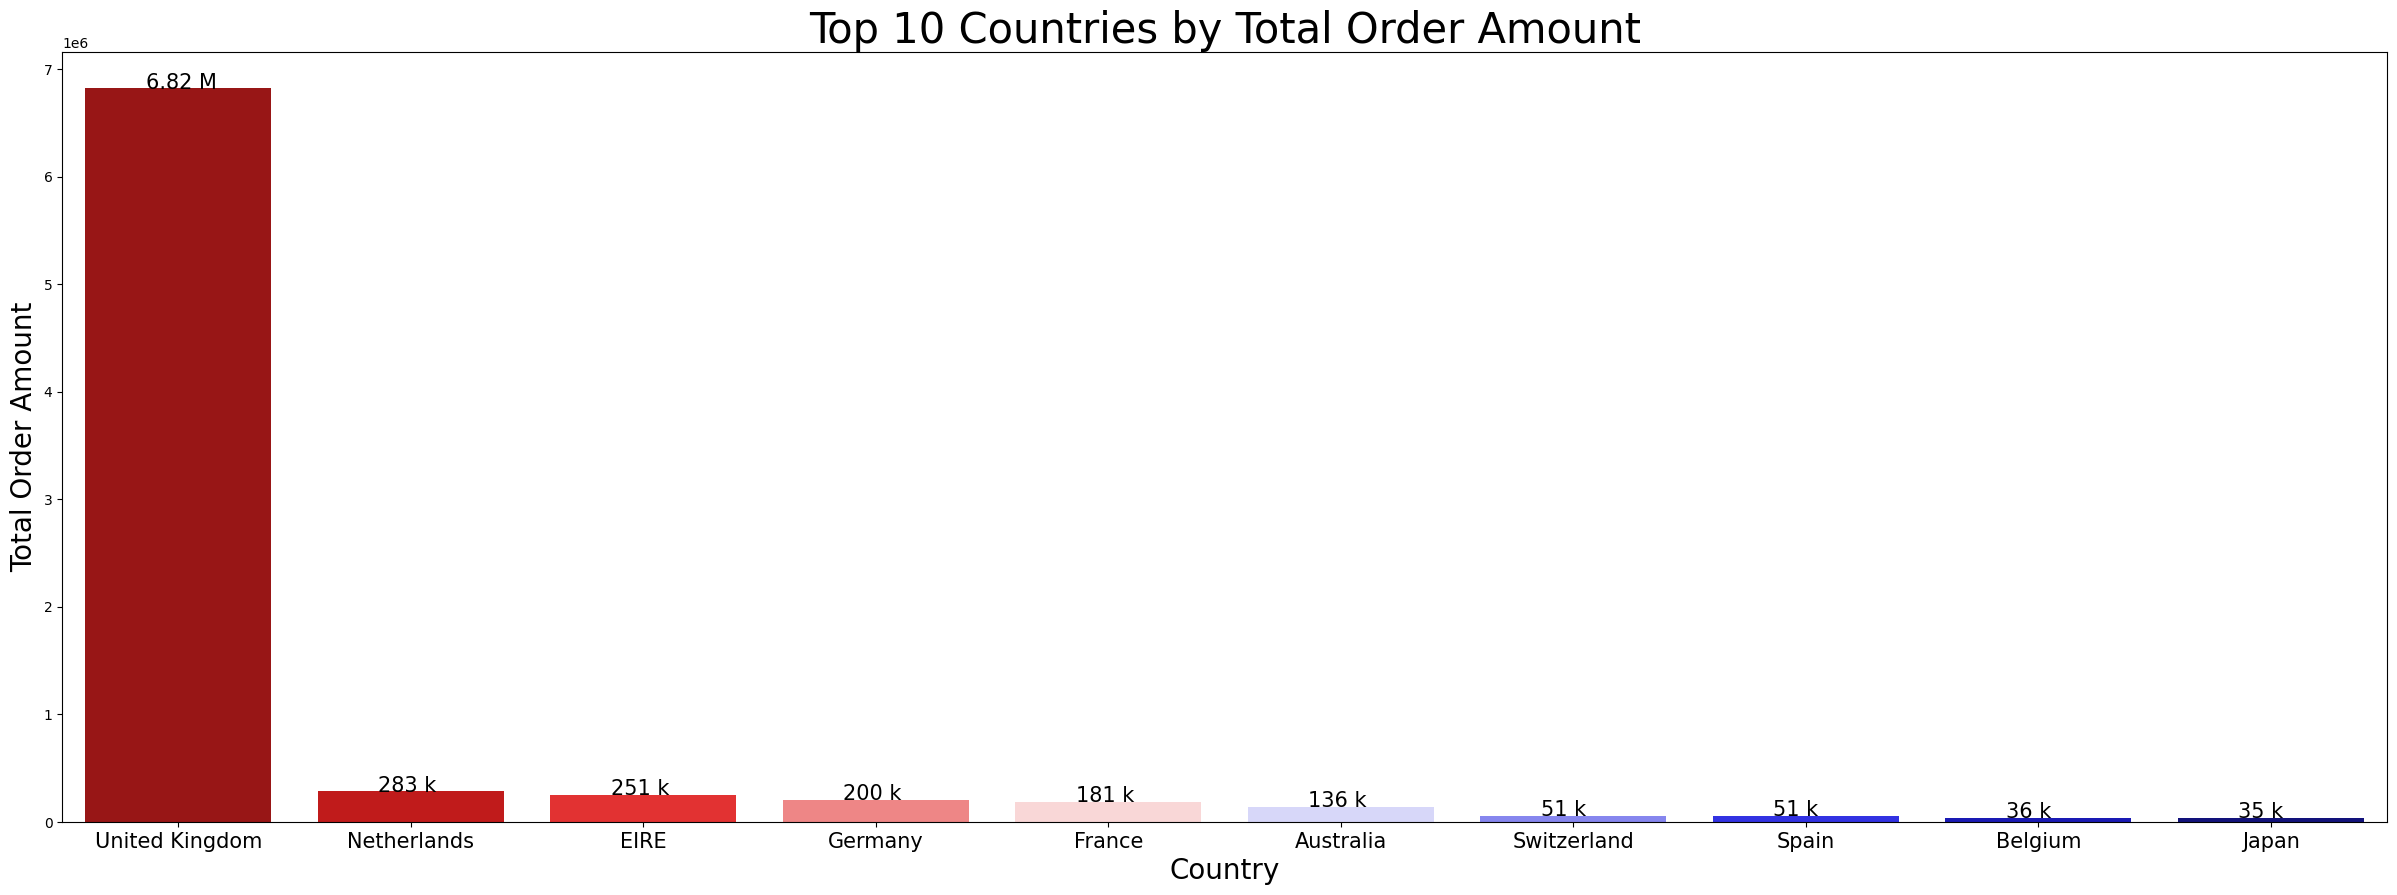

In [44]:
country_order = retail_df.groupby('country').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = country_order.index, y = country_order.values, palette = 'seismic_r')
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Total Order Amount', fontsize = 20)
ax.set_title('Top 10 Countries by Total Order Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in country_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in country_order.values:
    value_labels.append(str(int(x/1000))+' k')
value_labels[0] = '6.82 M'

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

### Top 10 Most Sold Items

<ipython-input-45-c9eafb5b1980>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_order = retail_df.groupby('description').sum()['tot_order'].nlargest(10)


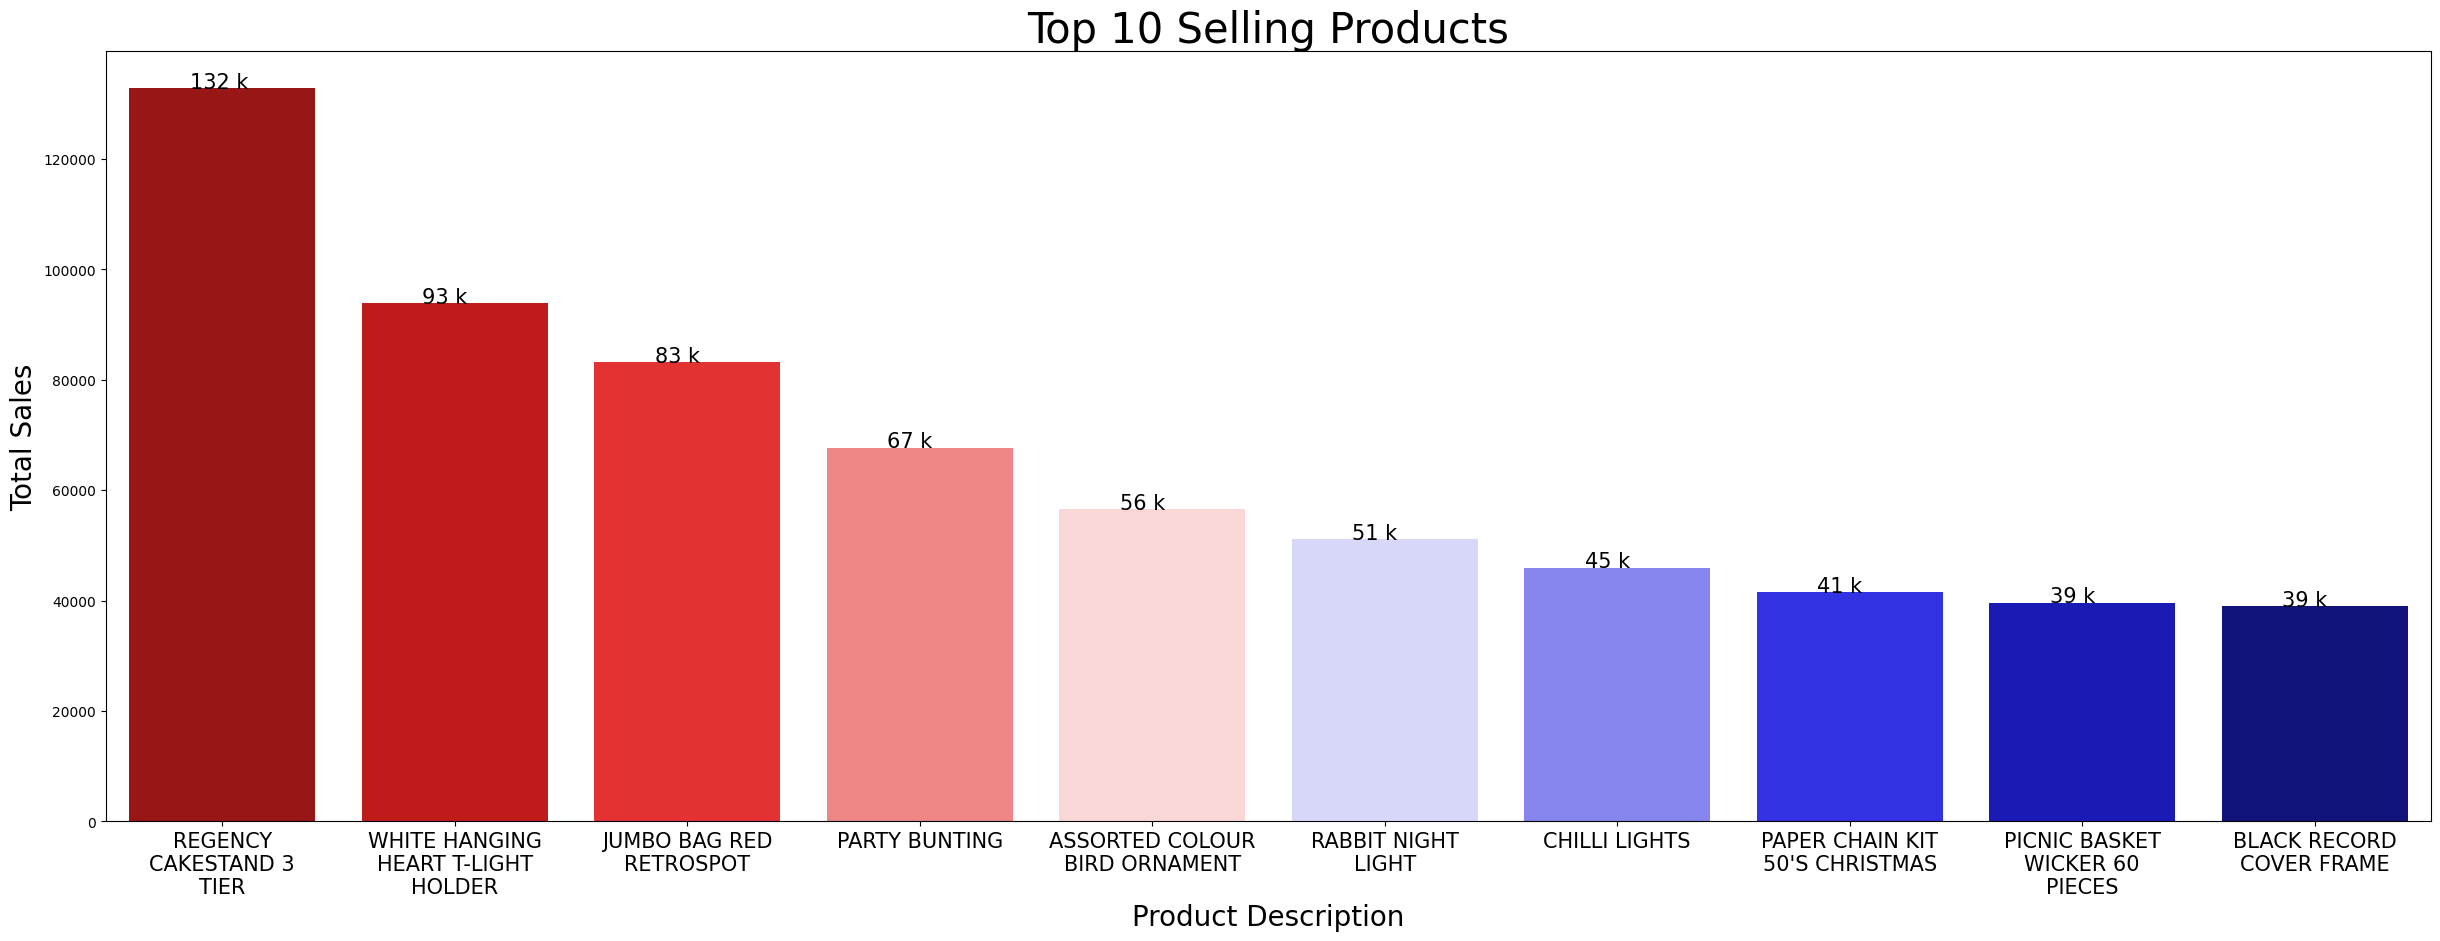

In [45]:
sales_order = retail_df.groupby('description').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = sales_order.index, y = sales_order.values, palette = 'seismic_r')
ax.set_xlabel('Product Description', fontsize = 20)
ax.set_ylabel('Total Sales', fontsize = 20)
ax.set_title('Top 10 Selling Products', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in sales_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in sales_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

 Customer cohorts, top countries, and top-selling products are interlinked in retail analysis, providing a comprehensive view that enables retailers to make data-driven decisions for targeted marketing, personalized customer experiences, and efficient inventory management.

 Now that we have top countries and top-selling products, we'll create customer cohorts.

## Creating Customer Cohorts
The first step is to create invoice period from invoice date. After that, we'll group the items, sales, units and customers by invoice period.

In [47]:
retail_df['invoice_period'] = retail_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))

<ipython-input-47-3f9914c25c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['invoice_period'] = retail_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))


In [49]:
invoice_period_grouped = retail_df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
invoice_period_agg

,total_customers,total_product_types,total_units,tot_order
invoice_period,,,,
2010-12,948,2427,295957,549996.100
2011-01,780,2149,269139,472914.850
2011-02,794,2140,262820,434945.260
2011-03,1017,2248,343999,575002.240
2011-04,896,2234,278383,420368.331
2011-05,1077,2266,369059,651910.230
2011-06,1049,2366,356669,641967.370
2011-07,982,2390,363193,581676.861
2011-08,977,2395,386998,613232.000


Now, we'll create labels for the invoice periods. However, we don't have initial purchase date for the customers. Therefore, we'll use the minimum of invoice date after grouping the data by customer_id.



In [61]:
retail_df.set_index('cust_id', inplace = True)

In [62]:
retail_df['cohort_group'] = retail_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))

<ipython-input-62-aa9f582f8fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['cohort_group'] = retail_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))


In [63]:
retail_df.reset_index(inplace = True)
retail_df.head()

,cust_id,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period,cohort_group
0,17850.0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850.0,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850.0,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850.0,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850.0,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


## Aggregating Metrices for Customers
Now that we have the labels for when a customer first made a purchase and when individual purchases occured, we can now create some aggregate metrics to represent each time period.

We count the total number of customers and products sold in a period by their unique ids and descriptions. We then sum the quantities sold and total invoice amount to get the aggregate sales figures for the periods.

In [64]:
grouped = retail_df.groupby(['cohort_group','invoice_period'])
cohorts = grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                     948                 2427   
             2011-01                     361                 1833   
             2011-02                     316                 1719   
             2011-03                     366                 1868   
             2011-04                     340                 1792   

                             total_units  tot_order  
cohort_group invoice_period                          
2010-12      2010-12              295957  549996.10  
             2011-01              158817  269782.69  
             2011-02              137715  230727.57  
             2011-03              179302  300720.43  
             2011-04              130568  199453.49

## Creating a Label for Invoice Groups
For cohort analysis, it is imperative to identify purchases across the lifetime of this customer. For example, if a customer joined 5 months ago, we would need labels from 1-5 to identify metrics across each month.

We create this label by first grouping our previous cohorts object by 'cohort_group'. We then find the length of each group and create a list to represent this range with np.arange(). For example, np.arange(5) returns [0, 1, 2, 3, 4].

As we want this list to start with 1, we add 1 to every number in this range.

In [65]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

<ipython-input-65-baeaf6edb2d4>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cohorts = cohorts.groupby(level=0).apply(cohort_period)


total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                     948                 2427   
             2011-01                     361                 1833   
             2011-02                     316                 1719   
             2011-03                     366                 1868   
             2011-04                     340                 1792   

                             total_units  tot_order  cohort_period  
cohort_group invoice_period                                         
2010-12      2010-12              295957  549996.10              1  
             2011-01              158817  269782.69              2  
             2011-02              137715  230727.57              3  
             2011-03              179302  300720.43              4  
             2011-04              130568  199453.49              5

## Various Metrices Across Cohorts

We'll now calculate various metrices across the customer cohorts.

### Customer Retention

Text(0.5, 1.0, 'Retention Rates Across Cohorts')

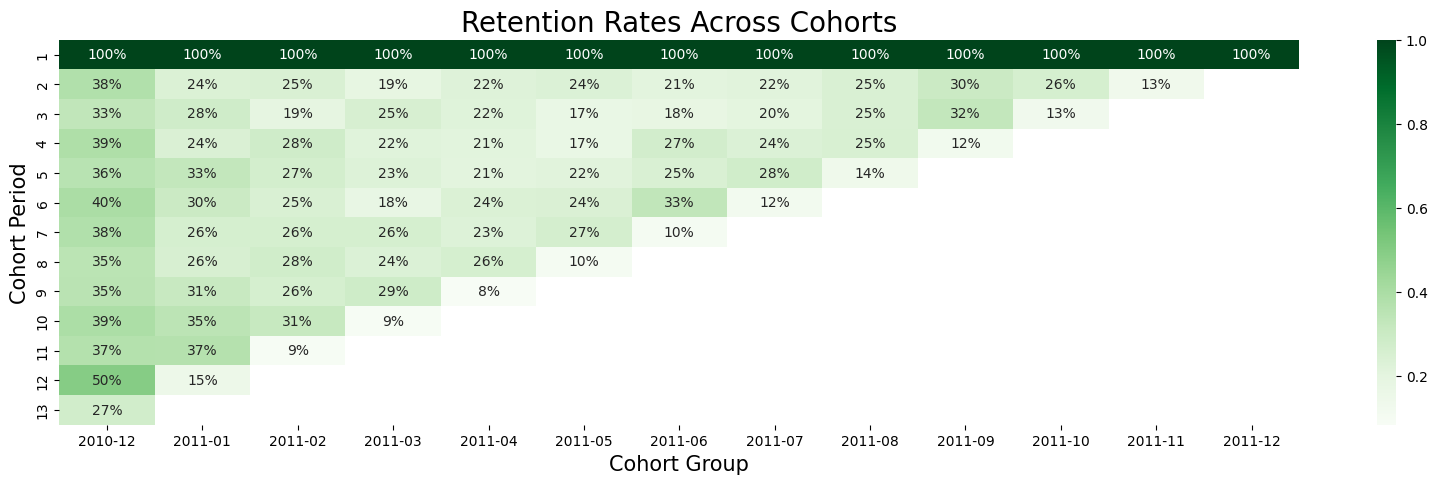

In [68]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()
user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(20,5))
ax = sb.heatmap(user_retention, annot=True,cmap='Greens', fmt='.0%')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Retention Rates Across Cohorts', fontsize = 20)

### Sales

Text(0.5, 1.0, 'Monthly Total Sales Across Cohorts')

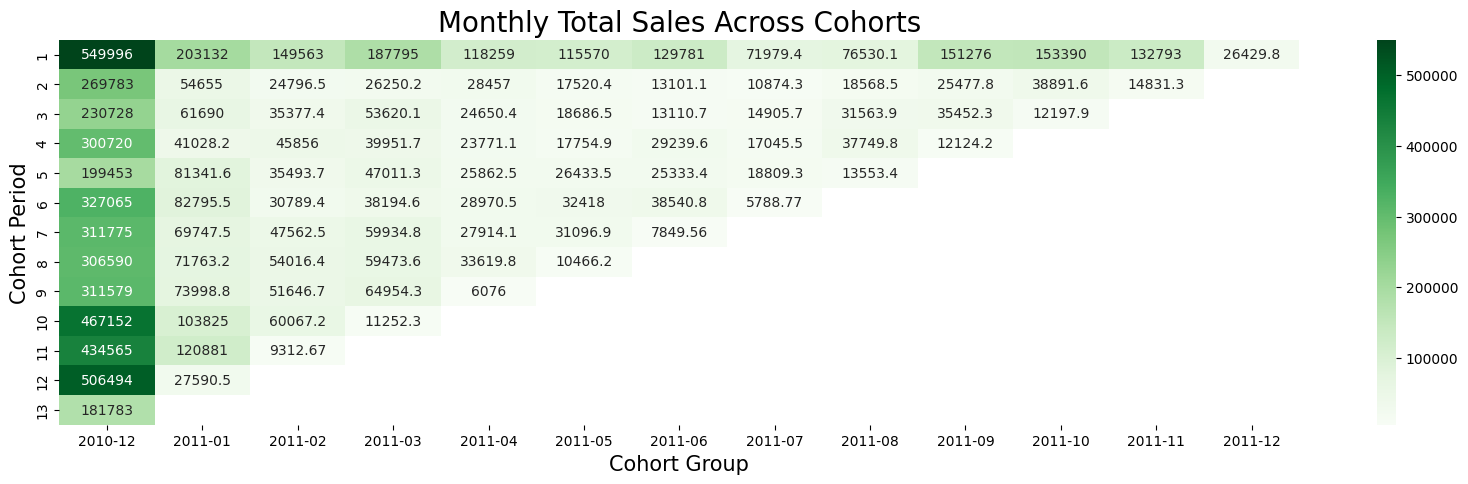

In [69]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_order'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_order, annot=True,cmap='Greens', fmt='g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Total Sales Across Cohorts', fontsize = 20)

### Monthly Active Customers

Text(0.5, 1.0, 'Monthly Active Customers Across Cohorts')

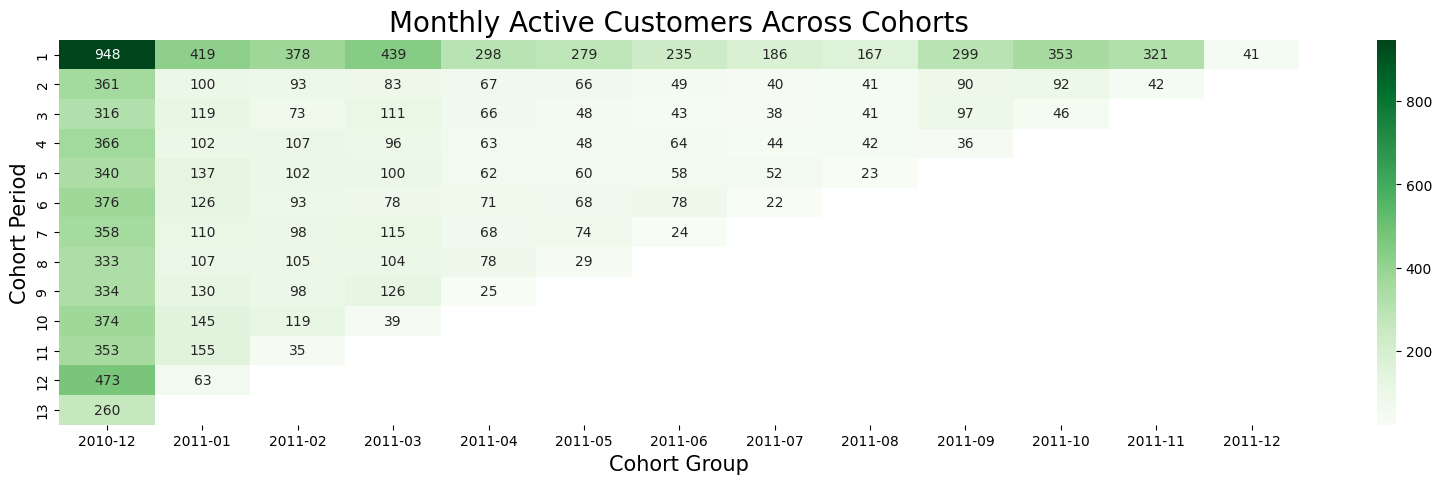

In [70]:
unstacked_cust = cohorts['total_customers'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_cust, annot = True, cmap='Greens', fmt = 'g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Active Customers Across Cohorts', fontsize = 20)

## Refunds/ Cancellations

In retail analysis, a refund is usually denoted using a negative value. Let's explore and see what item was refuned the most.

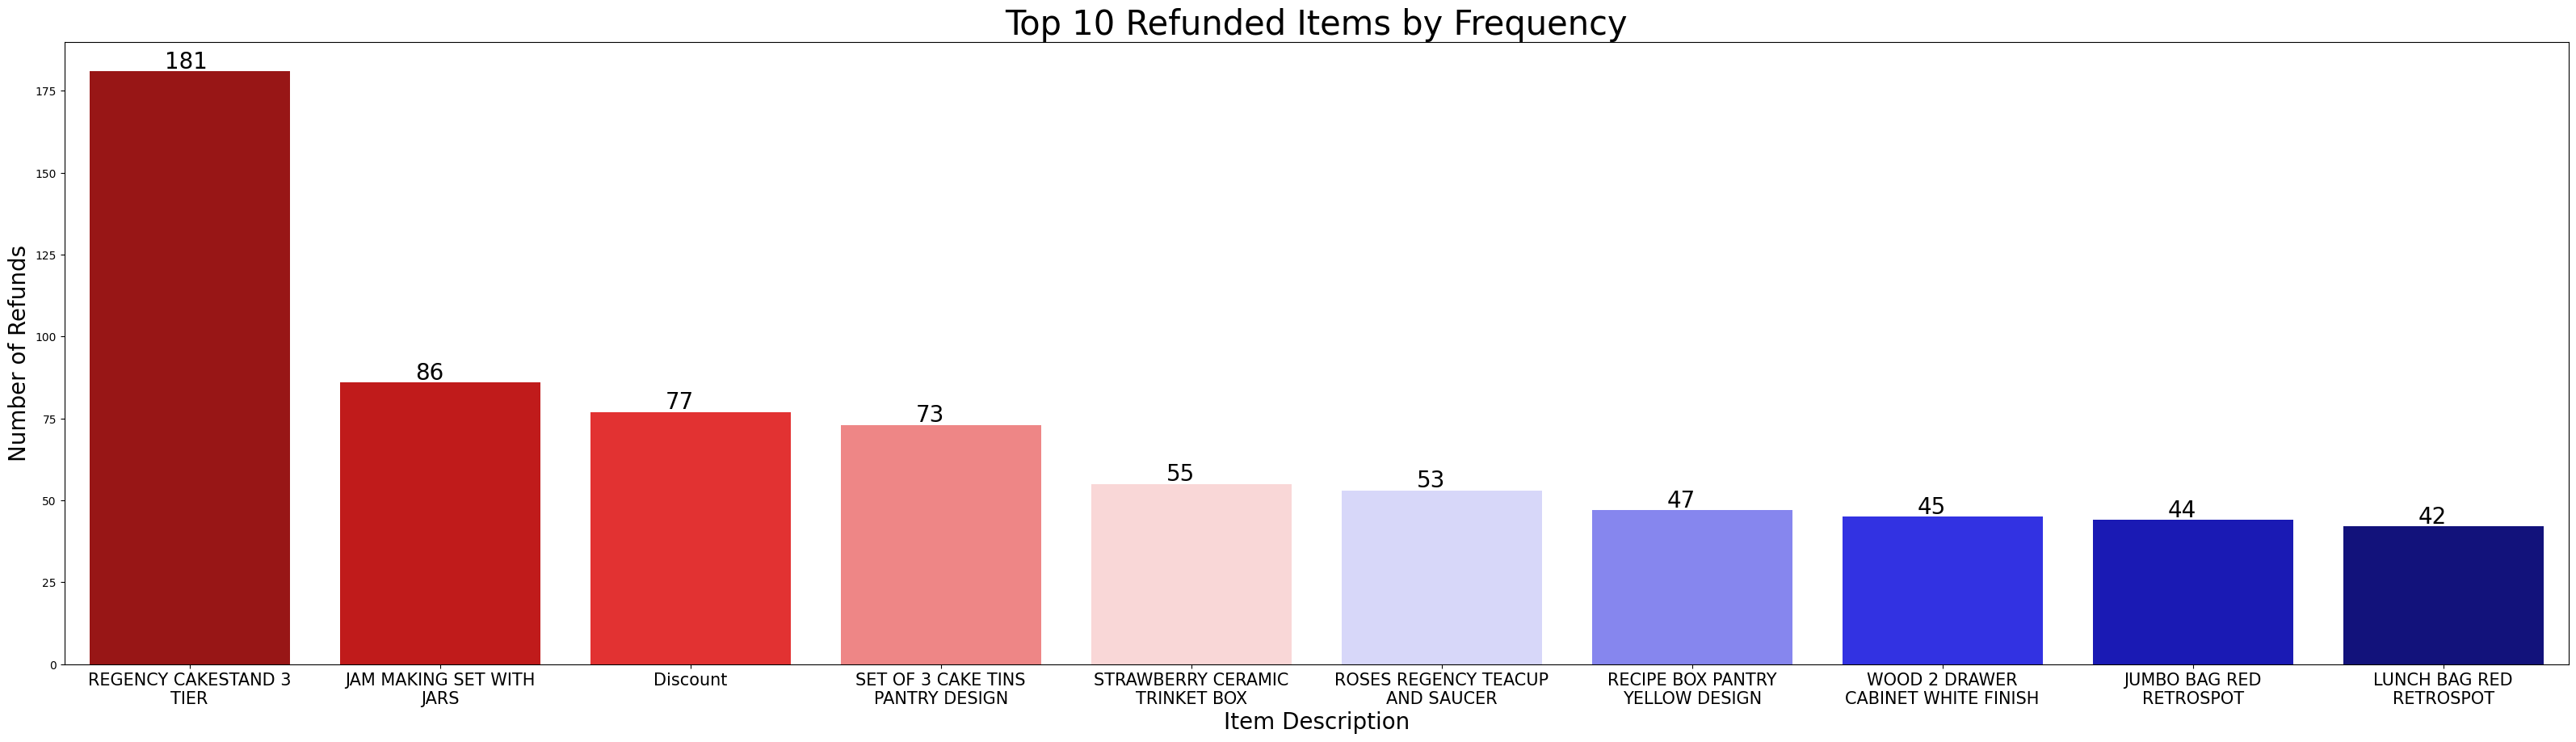

In [71]:
refund_df = refund_df[~refund_df['description'].isin(removed_cats)]

plt.figure(figsize = (40,10))
ax = sb.barplot(x = refund_df['description'].value_counts().nlargest(10).index, y = refund_df['description'].value_counts().nlargest(10).values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Number of Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Frequency', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in refund_df['description'].value_counts().nlargest(10).index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, refund_df['description'].value_counts().nlargest(10).values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() + 1), fontsize = 20)

Not only the **Regency Cakestand 3 Tier** was the most ordered item, it was the most returned item as well.

We'll also check the cost of returned items.

<ipython-input-72-b8db15a42c29>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_refund_amt = -refund_df.groupby('description').sum()['tot_order'].nsmallest(10)


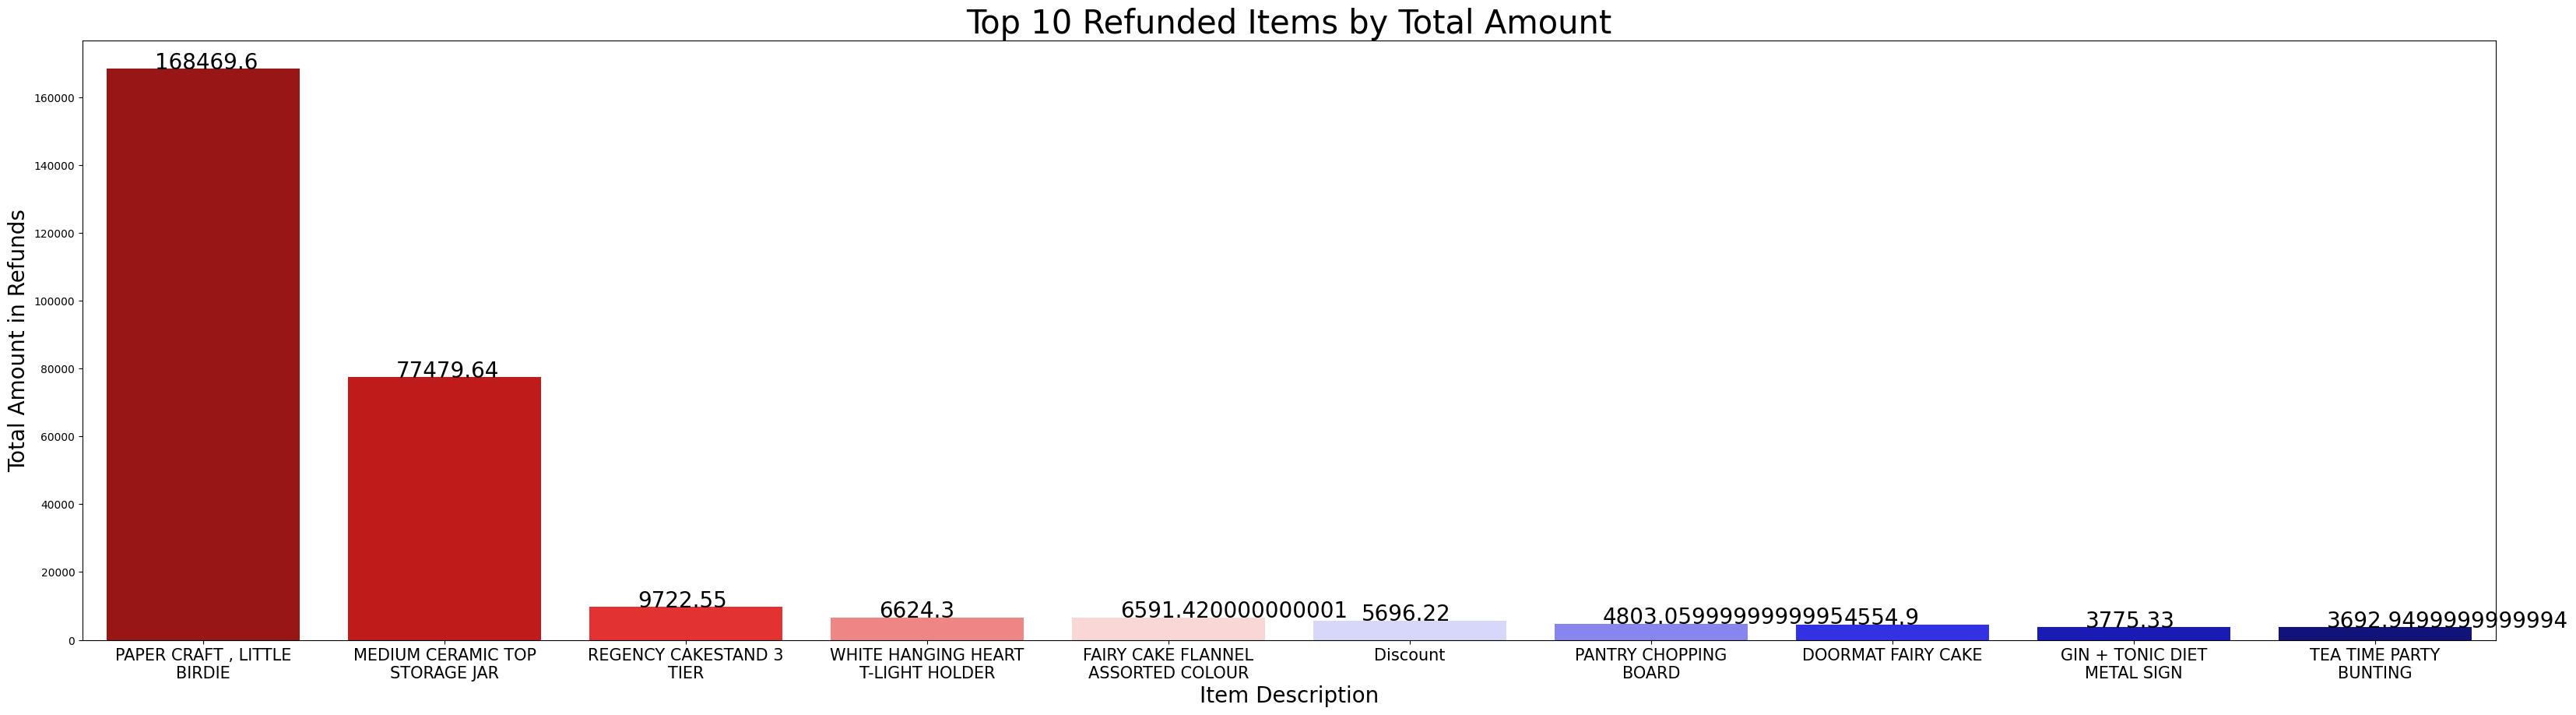

In [72]:
top_refund_amt = -refund_df.groupby('description').sum()['tot_order'].nsmallest(10)

plt.figure(figsize = (40,10))
ax = sb.barplot(x = top_refund_amt.index, y = top_refund_amt.values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Total Amount in Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Total Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in top_refund_amt.index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, top_refund_amt.values):
    ax.annotate(label, (p.get_x() + 0.2, p.get_height() + 10), fontsize = 20)

Even though Regency Cake Stand is the most returned item, Paper Craft, Little Birdie has the highest total refunded amount.

## Buidling on Success: Average Order Value (AOV) Across Cohorts

Now, we into our customer data to understand how spending habits evolve over time. By calculating the AOV for each cohort, we're getting a closer look at how different groups contribute to our overall revenue.

In [73]:
# Calculate total sales per invoice
retail_df['total_sales'] = retail_df['quantity'] * retail_df['unit_price']

# Group by cohort and calculate total sales and number of orders
cohort_aov = retail_df.groupby('cohort_group').agg({
    'total_sales': 'sum',
    'invoice_no': 'nunique'  # Counting unique invoice numbers as number of orders
})

# Calculate Average Order Value (AOV)
cohort_aov['aov'] = cohort_aov['total_sales'] / cohort_aov['invoice_no']

# Display the AOV for each cohort
print(cohort_aov[['aov']])

                     aov
cohort_group            
2010-12       431.314686
2011-01       387.070480
2011-02       305.202444
2011-03       322.431879
2011-04       297.638576
2011-05       297.954426
2011-06       346.301819
2011-07       279.925745
2011-08       440.509307
2011-09       324.176418
2011-10       305.193881
2011-11       311.442996
2011-12       587.327778


<ipython-input-73-d2475df8ec6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['total_sales'] = retail_df['quantity'] * retail_df['unit_price']


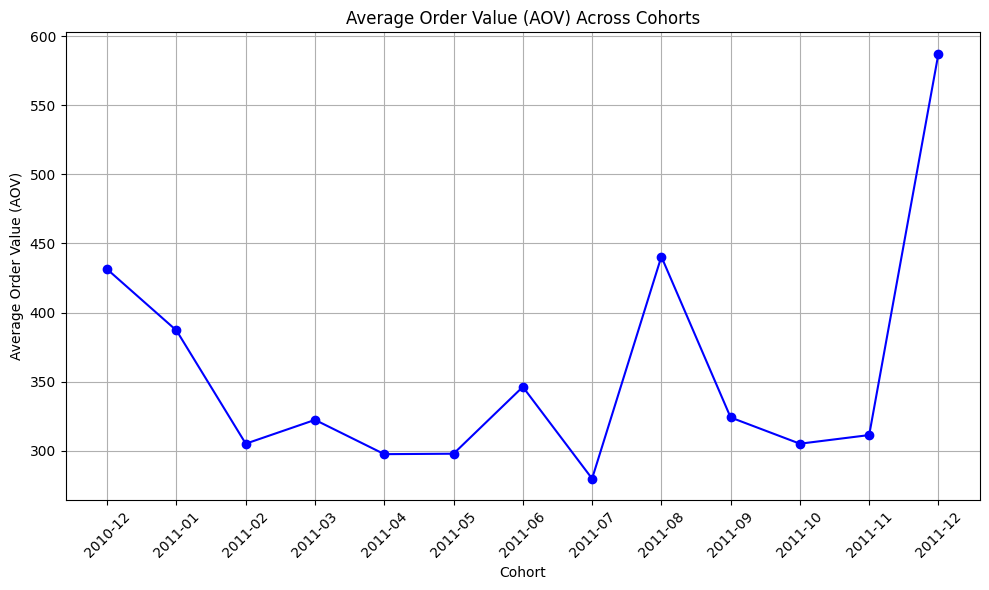

In [74]:
# Plotting the AOV trends
plt.figure(figsize=(10, 6))
plt.plot(cohort_aov.index, cohort_aov['aov'], marker='o', linestyle='-', color='b')
plt.title('Average Order Value (AOV) Across Cohorts')
plt.xlabel('Cohort')
plt.ylabel('Average Order Value (AOV)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()